In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [2]:
df = pd.read_csv("fff.csv")
df = df.drop(columns="Unnamed: 0")

In [5]:
df

,station_id,teplota vzduchu,vlhkost vzduchu,teplota rosneho bodu,rychlost vetra,smer vetra,teplota vozovky,grip,water,snow,...,timestamp,warning,surface_state,surface_state_error,surface_state_dry,surface_state_moist,surface_state_wet,surface_state_frosty,surface_state_snowy,surface_state_icy
0,50,8.9,68.4,3.4,3.2,149.0,10.1,0.82,0.0,0.00,...,1619993400000000000,0,1,0,1,0,0,0,0,0
1,54,8.1,66.1,2.2,3.6,307.0,10.8,0.82,0.0,0.00,...,1619993700000000000,0,1,0,1,0,0,0,0,0
2,53,6.3,62.3,-0.3,1.4,240.0,9.8,0.82,0.0,0.00,...,1619994300000000000,0,1,0,1,0,0,0,0,0
3,54,8.0,66.6,2.2,2.7,319.0,10.9,0.82,0.0,0.00,...,1619994600000000000,0,1,0,1,0,0,0,0,0
4,50,8.6,66.6,2.7,4.2,152.0,10.2,0.82,0.0,0.00,...,1619994900000000000,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91388,54,-2.4,65.0,-8.0,2.1,356.0,-2.4,0.82,0.0,0.00,...,1646091300000000000,0,1,0,1,0,0,0,0,0
91389,50,-2.3,64.7,-8.0,1.3,318.0,-1.9,0.65,0.0,0.01,...,1646091600000000000,0,1,0,1,0,0,0,0,0
91390,50,-2.4,64.7,-8.1,1.4,328.0,-1.9,0.68,0.0,0.01,...,1646091900000000000,0,1,0,1,0,0,0,0,0
91391,54,-2.3,65.7,-7.9,2.8,20.0,-2.6,0.82,0.0,0.00,...,1646092200000000000,0,1,0,1,0,0,0,0,0


<AxesSubplot:xlabel='teplota vzduchu', ylabel='vlhkost vzduchu'>

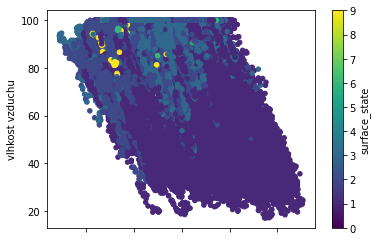

In [16]:
# ax = df.plot.scatter(x="teplota vzduchu", y="vlhkost vzduchu",c="surface_state_dry",  label="Group 1")

df.plot.scatter(x="teplota vzduchu", y="vlhkost vzduchu",c="surface_state",cmap="viridis")
# df.plot.scatter(x="teplota vzduchu", y="vlhkost vzduchu",c=['surface_state_dry','surface_state_frosty'],cmap="viridis")

In [21]:
df[['teplota vzduchu','vlhkost vzduchu']].values


array([[ 8.9, 68.4],
       [ 8.1, 66.1],
       [ 6.3, 62.3],
       ...,
       [-2.4, 64.7],
       [-2.3, 65.7],
       [-2.3, 64.6]])

In [25]:
from sklearn.preprocessing import StandardScaler

X = df[['teplota vzduchu','vlhkost vzduchu']].values
y = df['surface_state'].values
scaler = StandardScaler()
scaler.fit(X)

X_t = scaler.transform(X)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_t, y)
y_pred = classifier.predict(X)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))


[[    0    10     4     0     0     0     0     0]
 [    0 61501  3171  1076     0     0     0     0]
 [    0  9618  4103   840     0     0     0     0]
 [    0  7979  1514   483     0     0     0     0]
 [    0     5     0     0     0     0     0     0]
 [    0   490   175   103     0     0     0     0]
 [    0    14     4     2     0     0     0     0]
 [    0   144   142    15     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.77      0.94      0.85     65748
           2       0.45      0.28      0.35     14561
           3       0.19      0.05      0.08      9976
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00       768
           7       0.00      0.00      0.00        20
           9       0.00      0.00      0.00       301

    accuracy                           0.72     91393
   macro avg       0.18      0.16      0.16     9

/home/fagh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fagh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fagh/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
